In [2]:
load("dataset.RData")
packages = c("tidyverse","stringr","lubridate","xlsx","forcats","RColorBrewer","scales")
lapply(packages, require,character.only = TRUE)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: stringr
Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: xlsx
Loading required package: rJava
Loading required package: xlsxjars
Loading required package: forcats
Loading required package: RColorBrewer
Loading required package: scales

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

Warning message:
"Removed 1293869 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1293869 rows containing missing values (geom_point)."

[1] 0.4334599

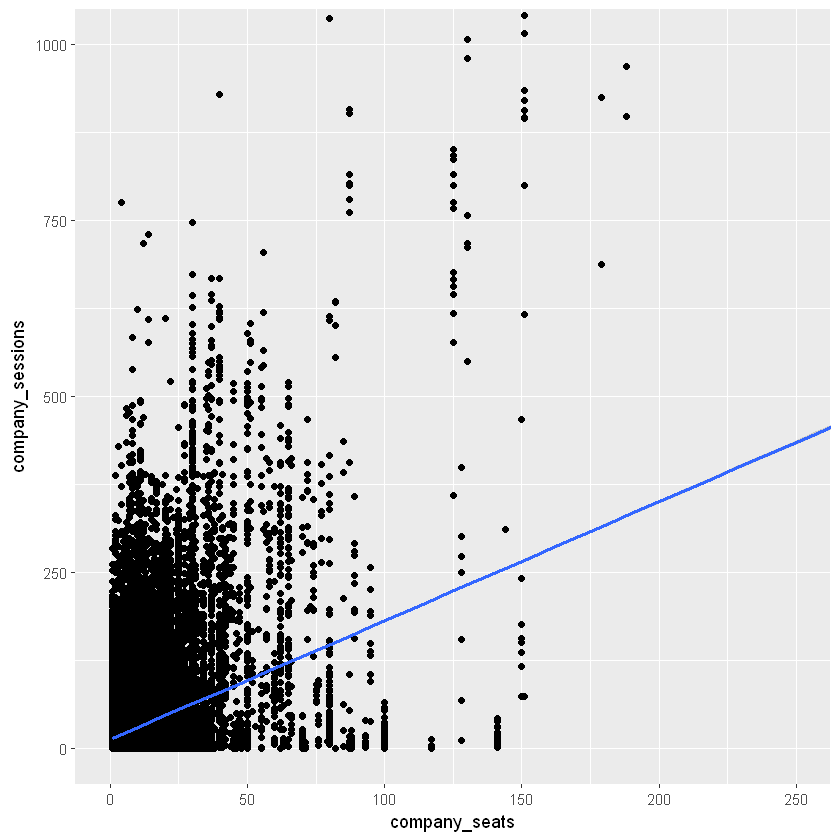

In [5]:
#----------------------------------------------
#seats and sessions, but not time series
seats_and_sessions <- dataset %>%
    filter(product_line_code == "AECCOL") %>%
    group_by(owner_id,dt) %>%
    summarise(company_seats = max(purchased_seat_quantity),company_sessions = sum(sessions))

seats_and_sessions %>%
    ggplot(mapping = aes(x = company_seats,y = company_sessions)) +
    geom_point() +
    coord_cartesian(xlim = c(0,250), ylim = c(0,1000)) +
    geom_smooth(method = "lm")

cor(seats_and_sessions$company_seats,seats_and_sessions$company_sessions,use = "complete.obs")


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

Warning message in dir.create("time_series_sessions"):
"'time_series_sessions' already exists"

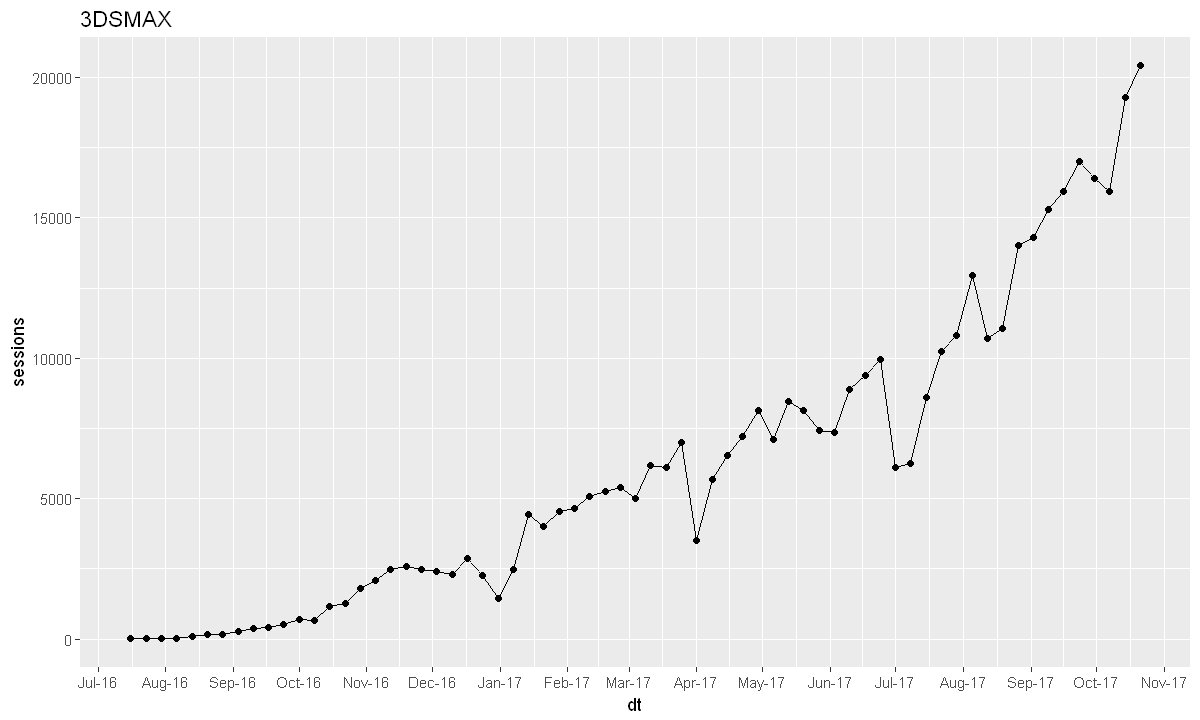

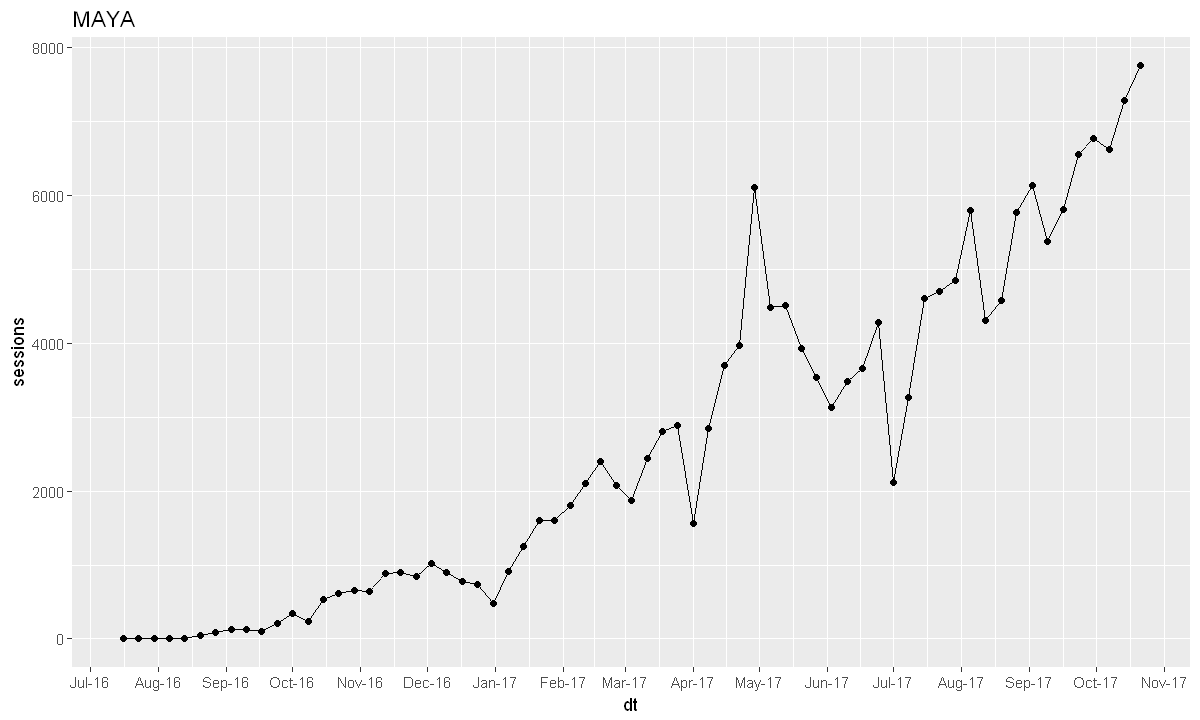

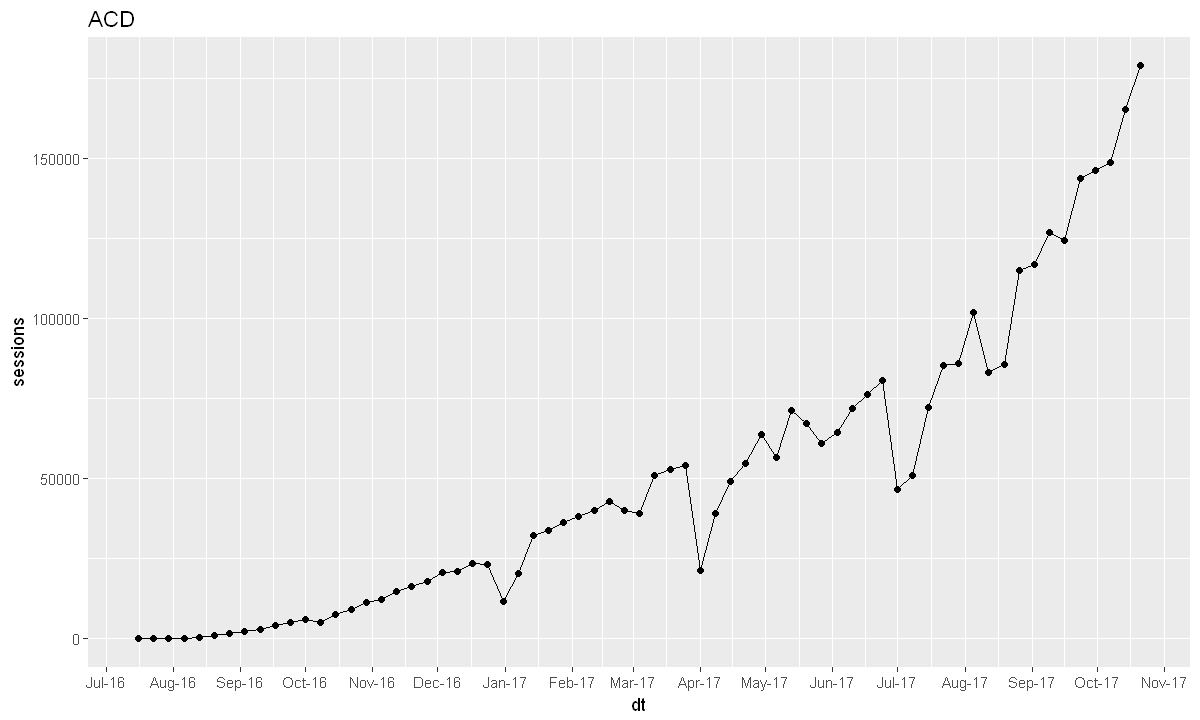

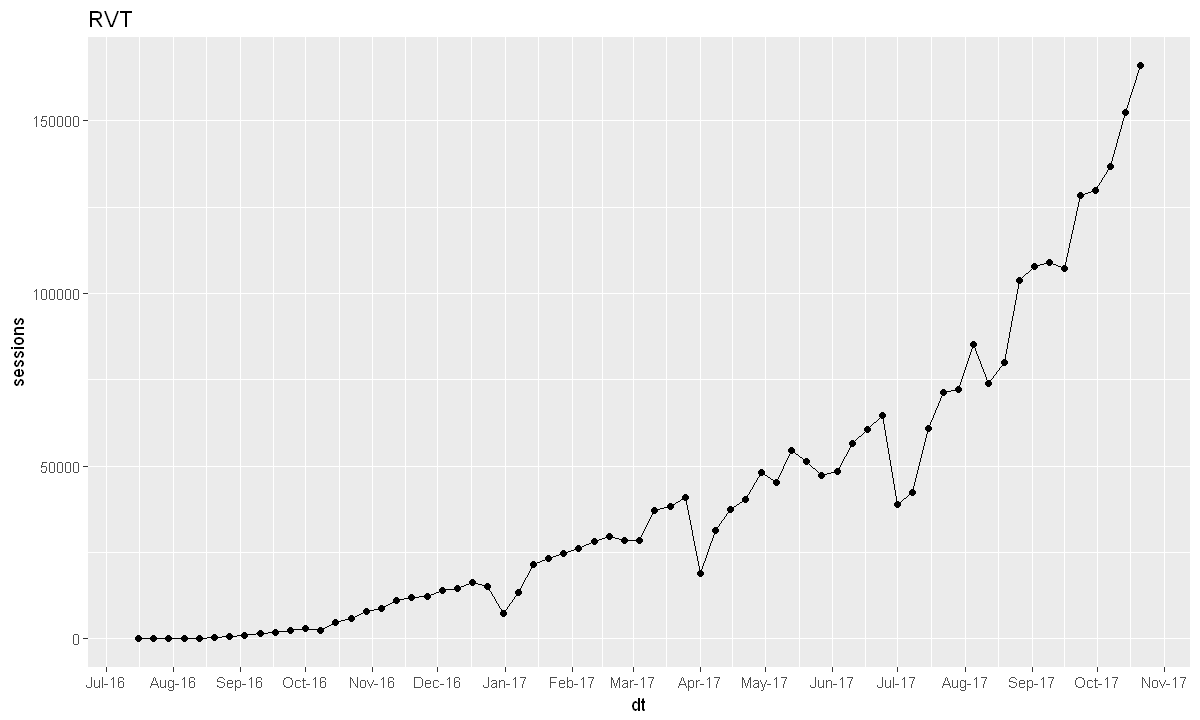

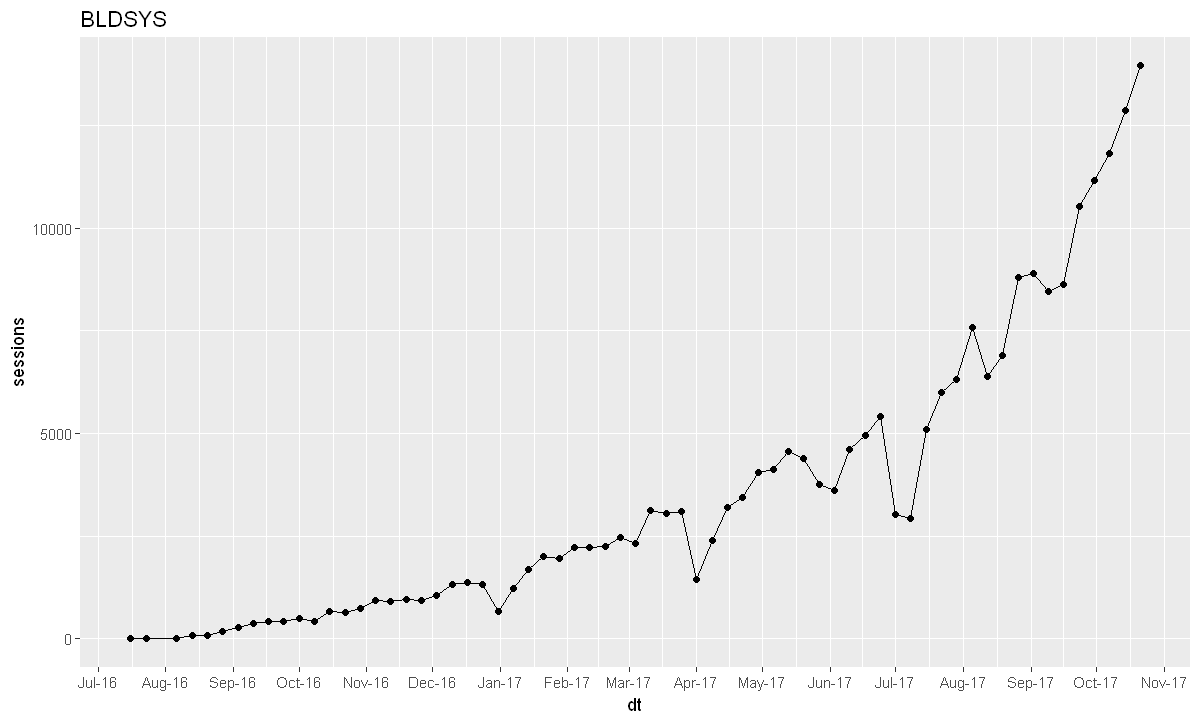

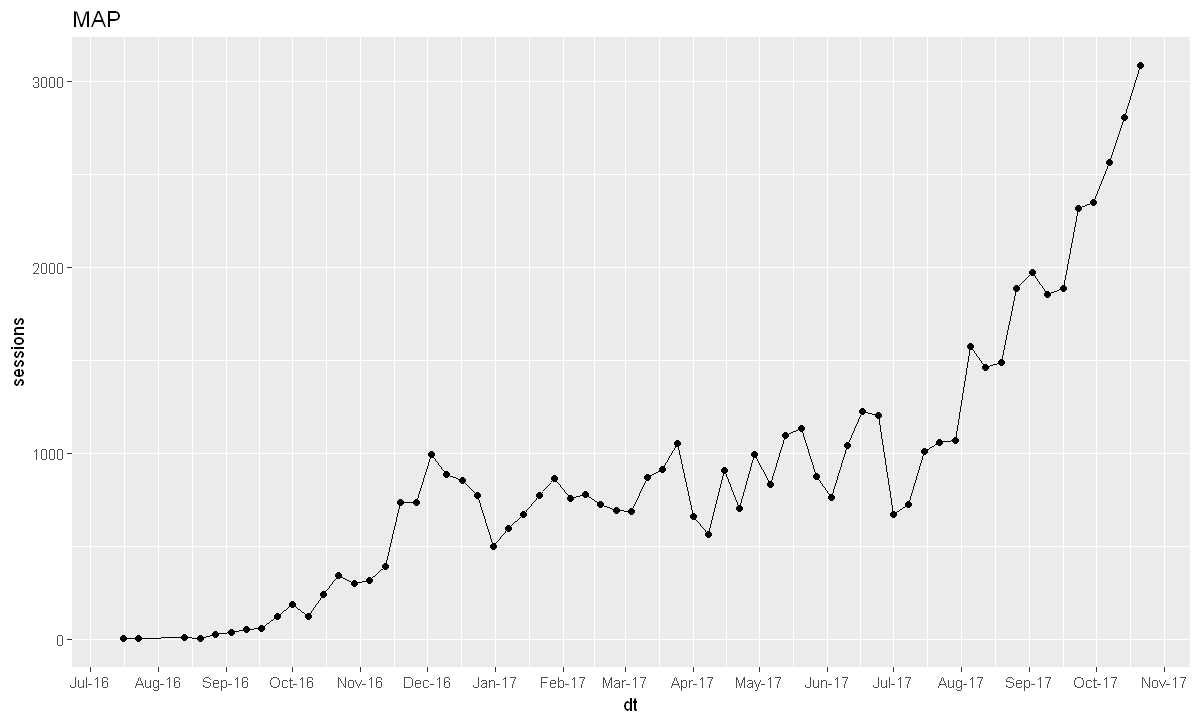

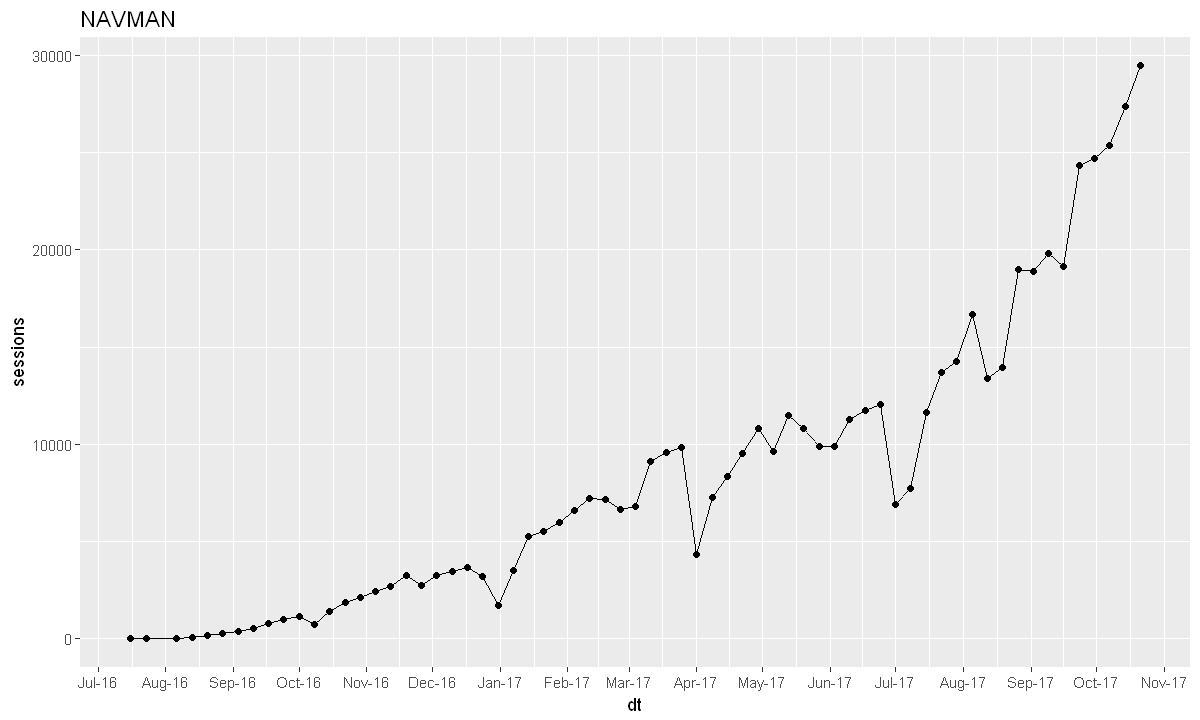

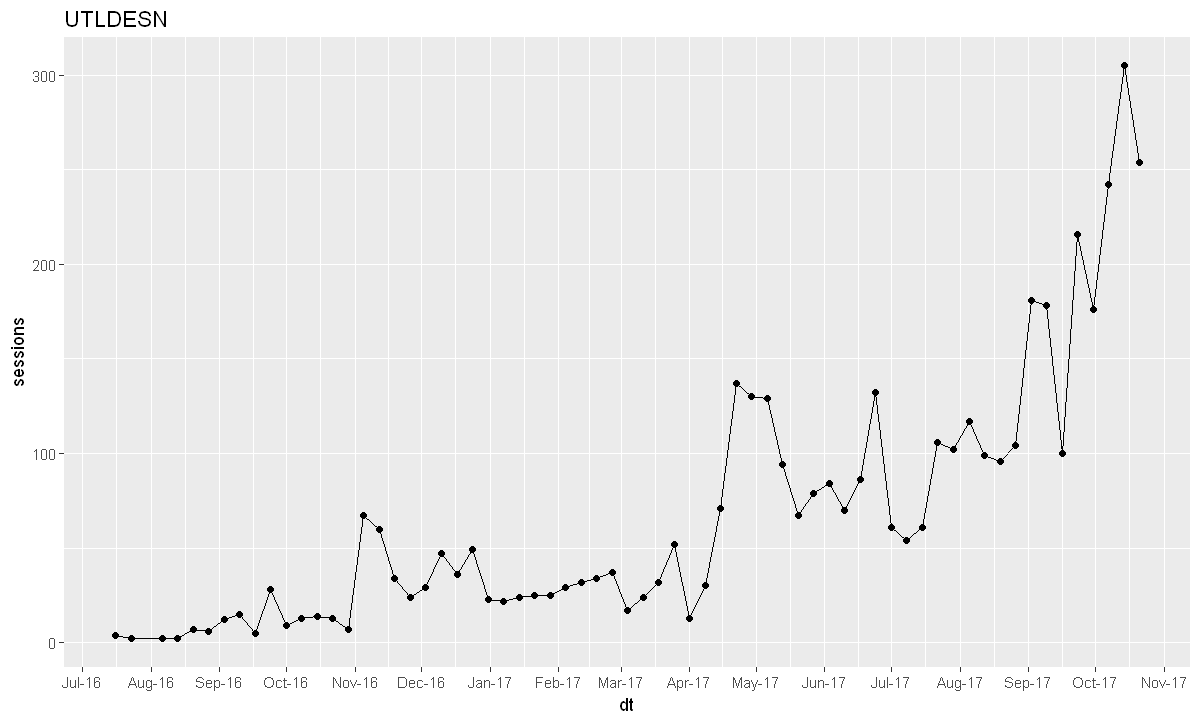

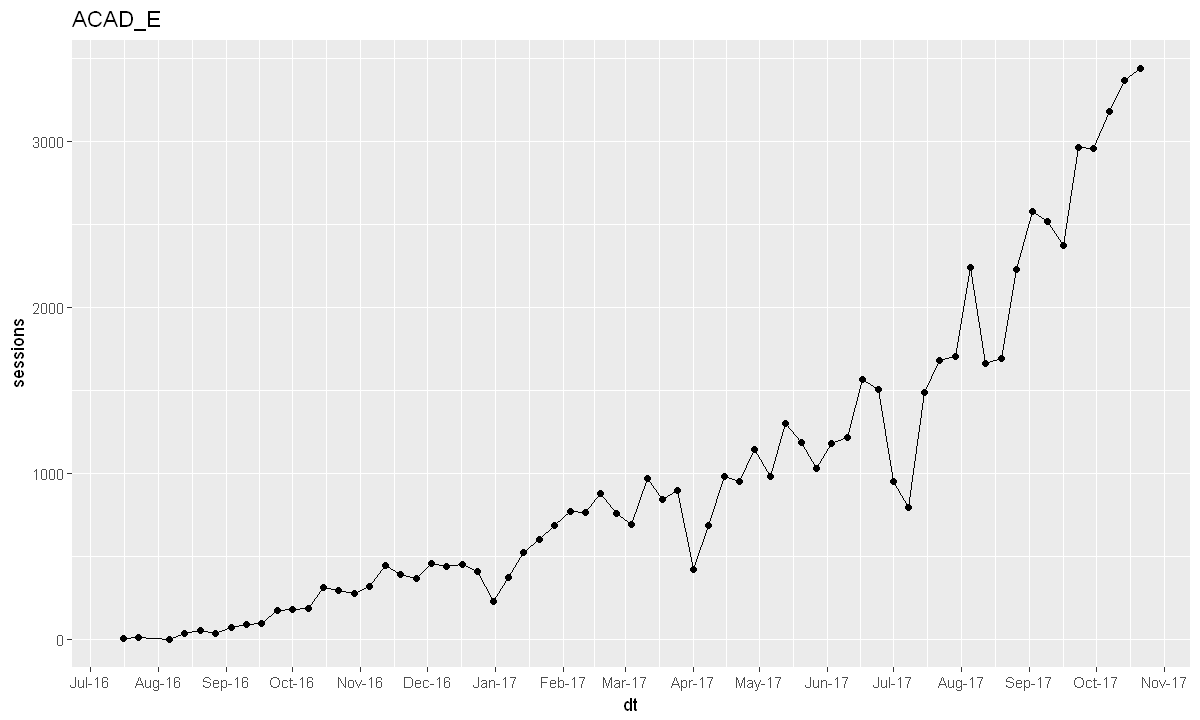

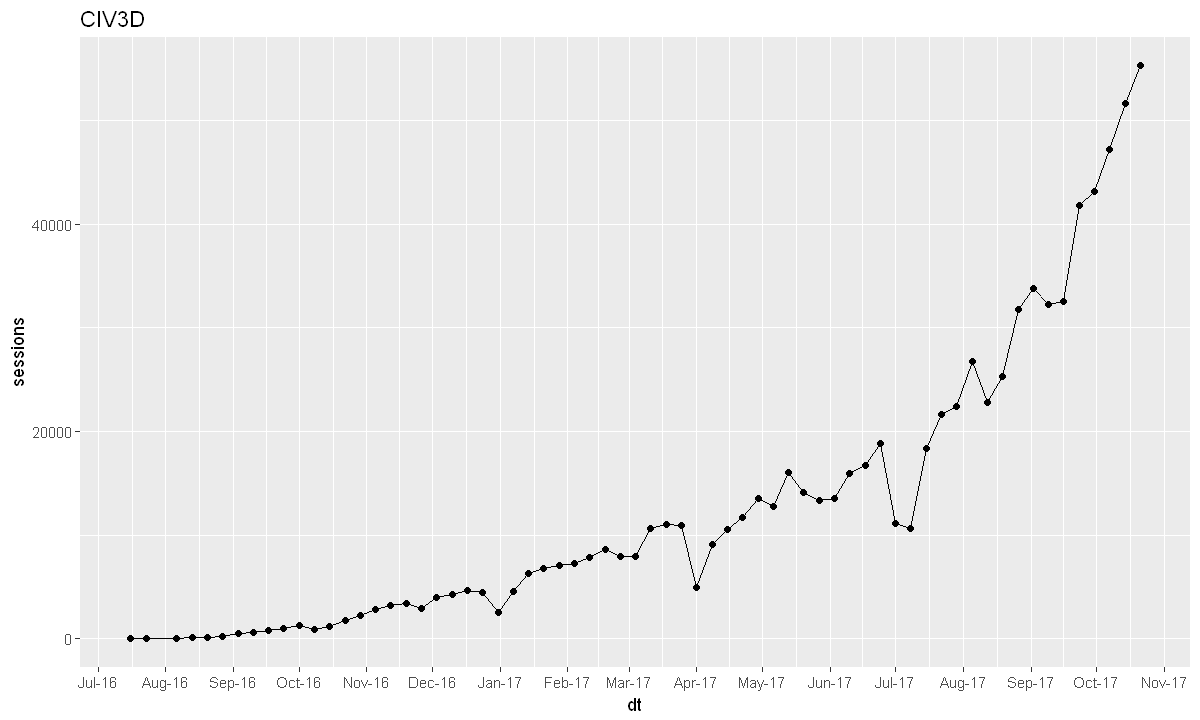

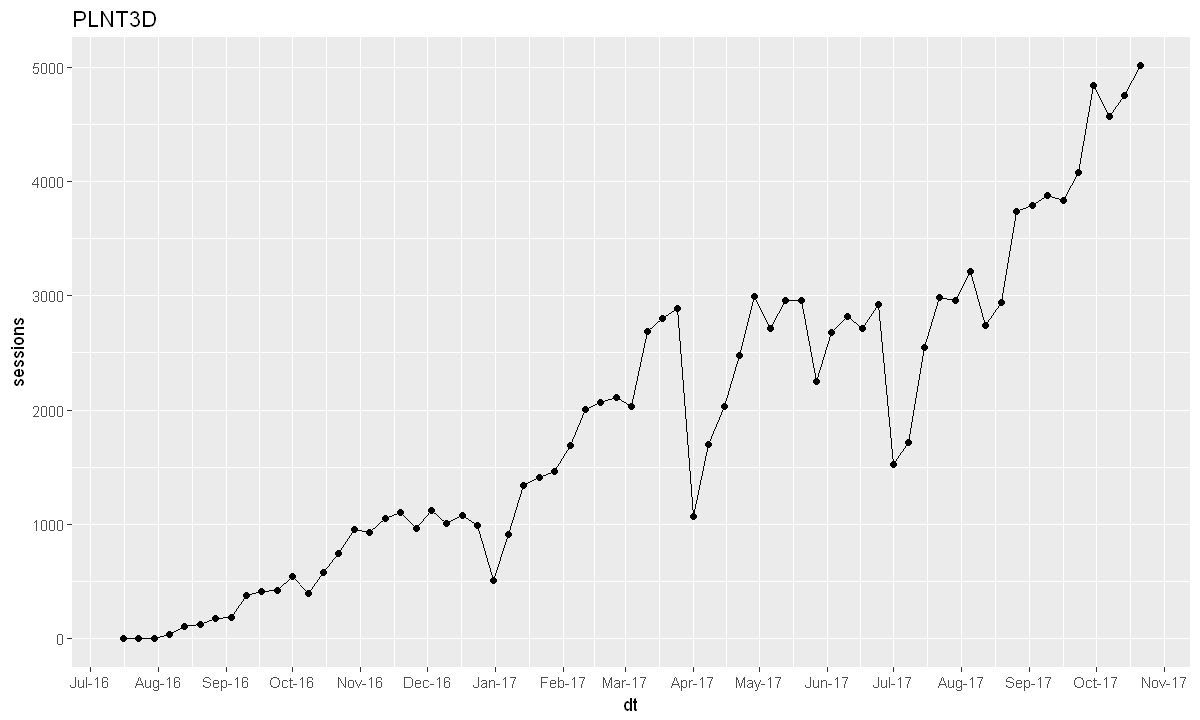

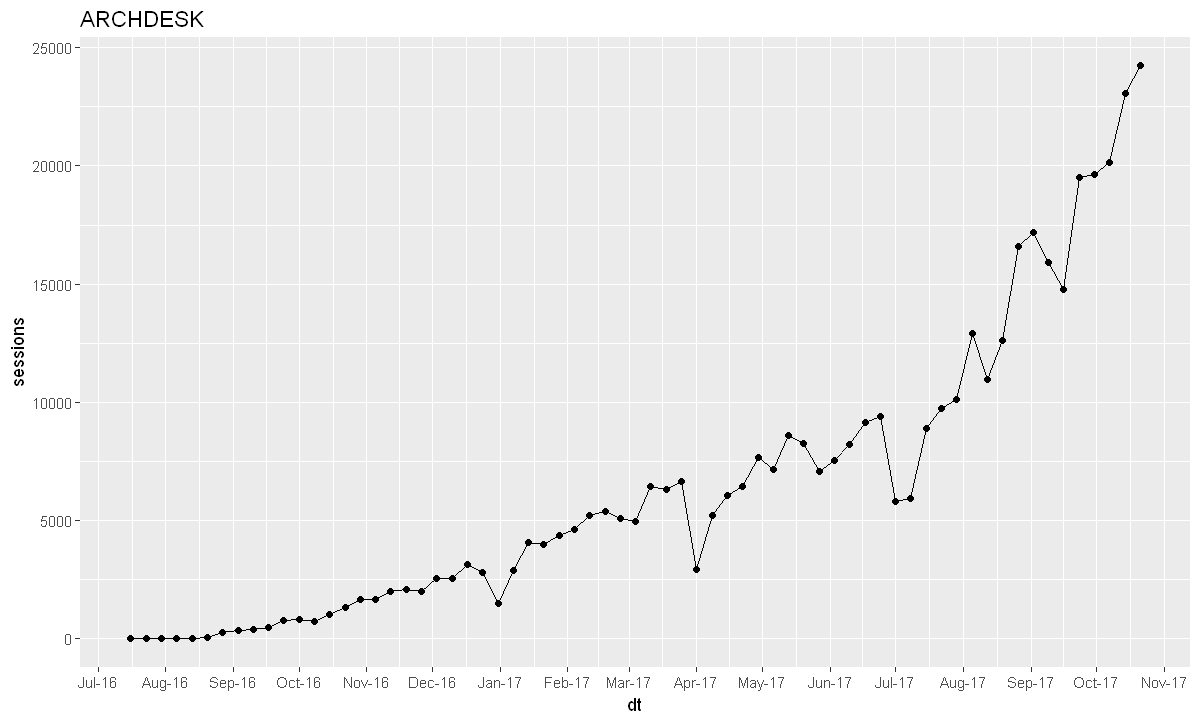

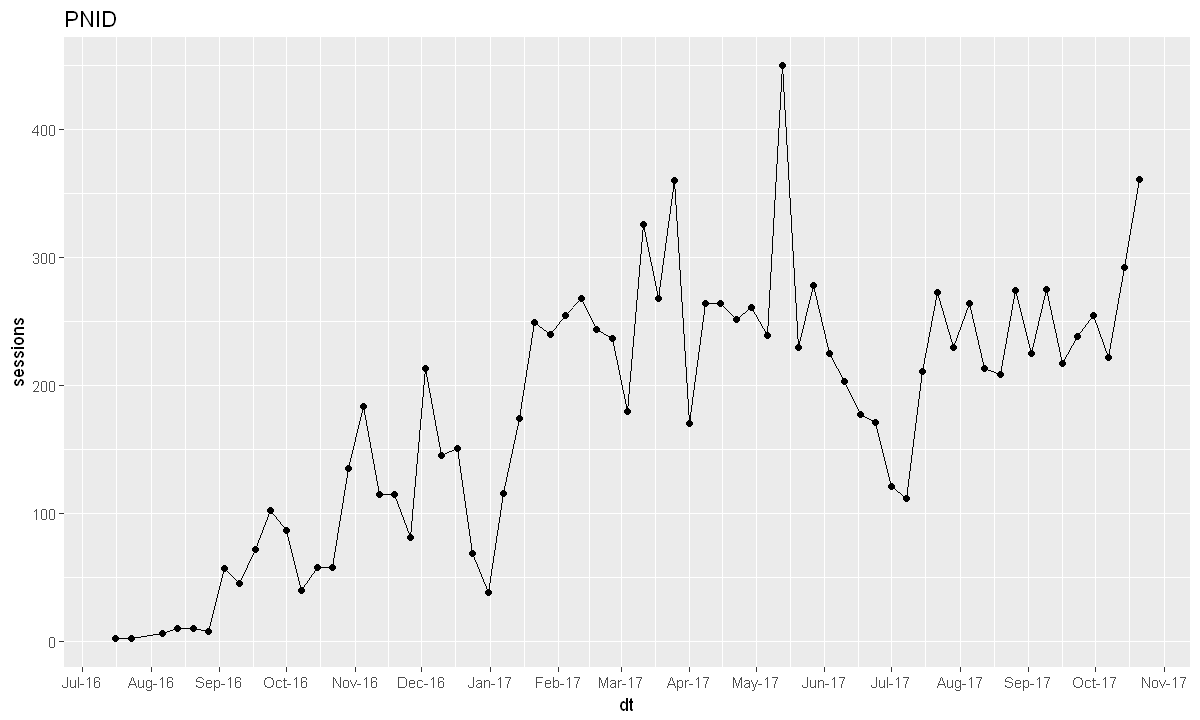

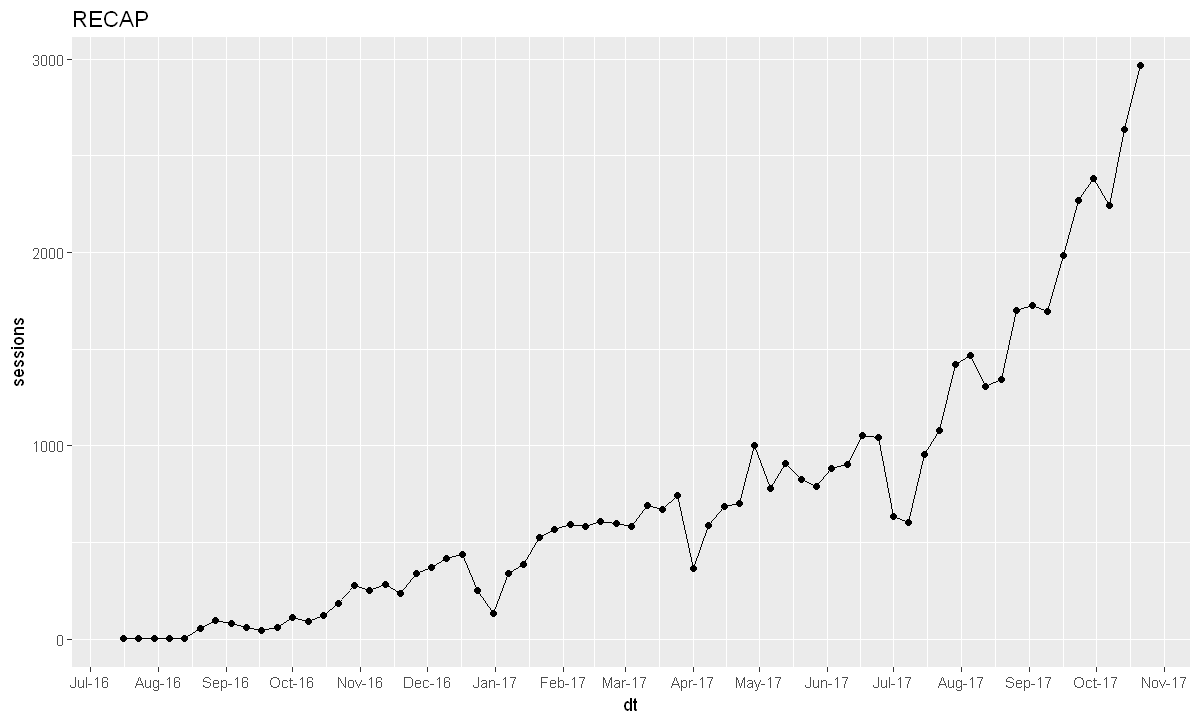

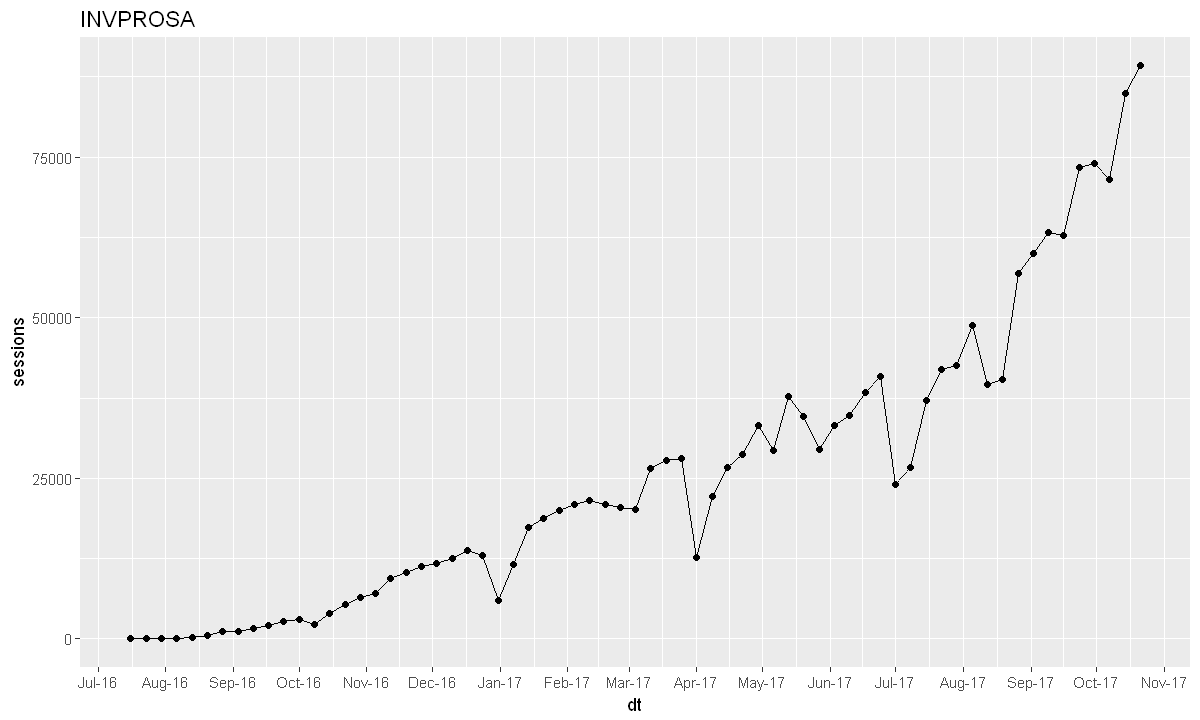

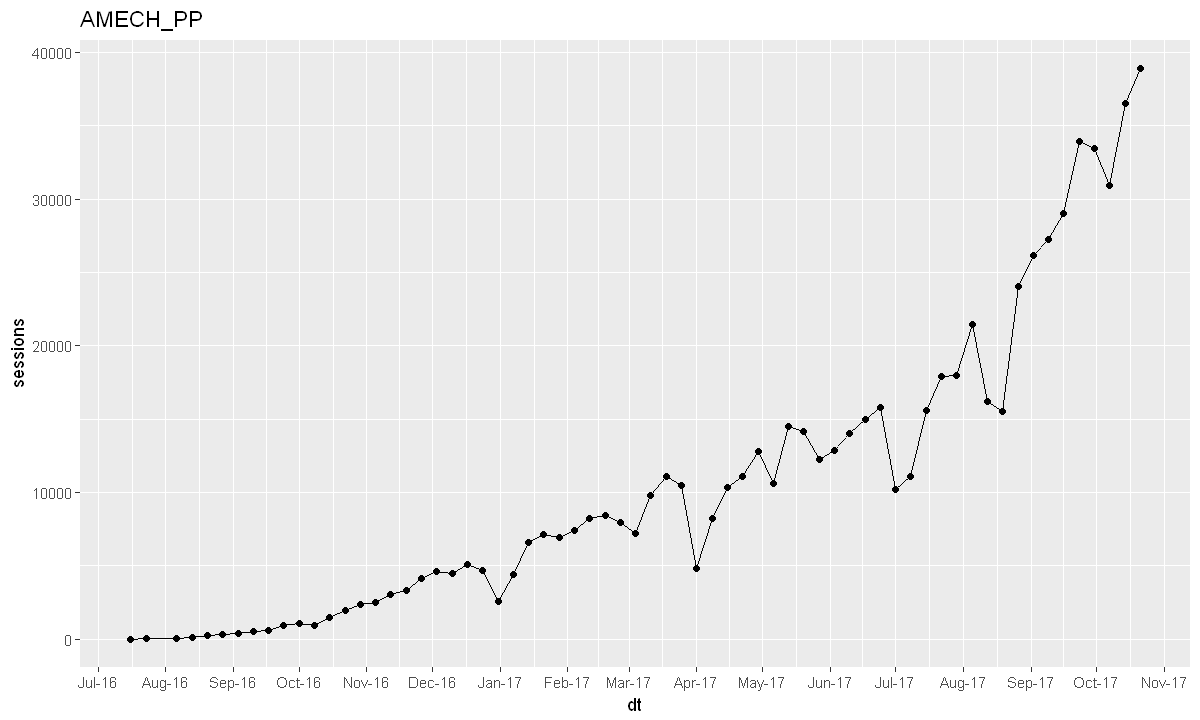

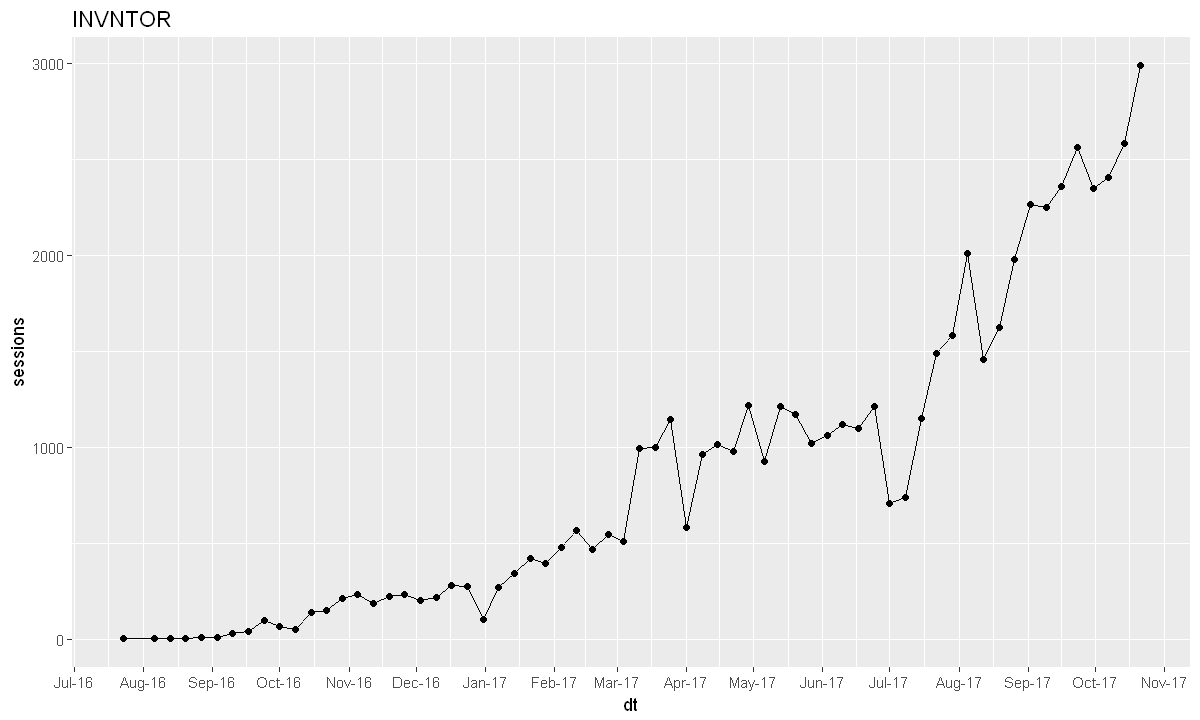

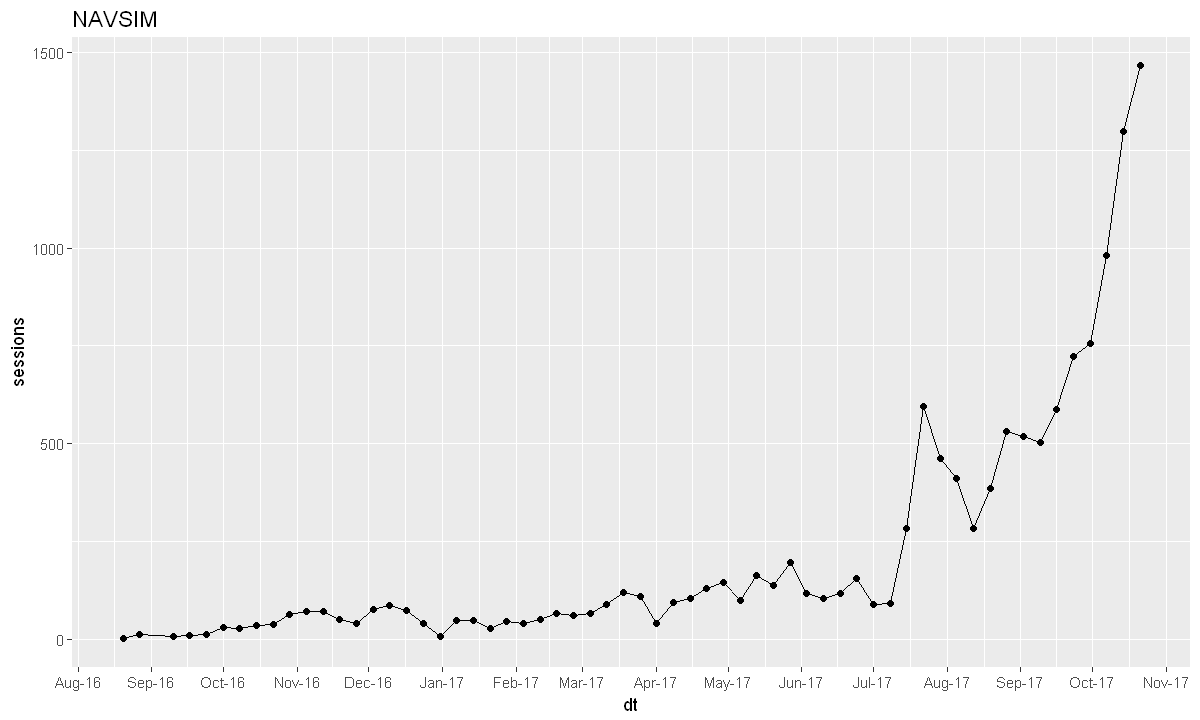

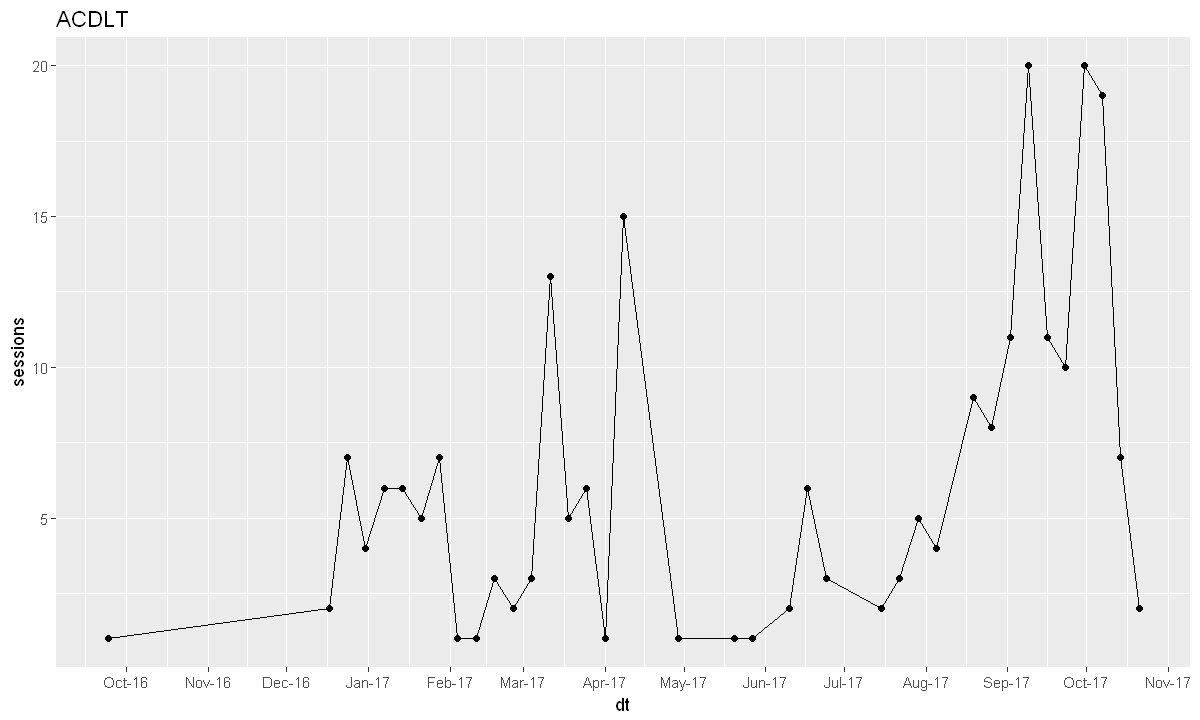

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


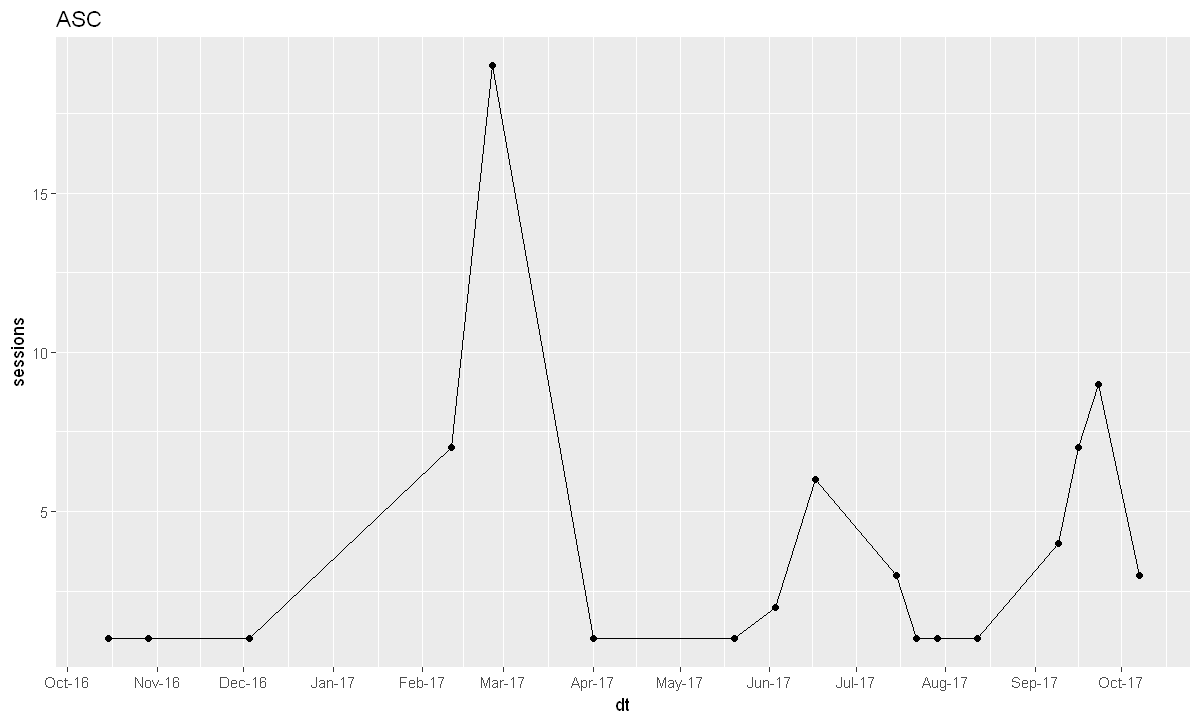

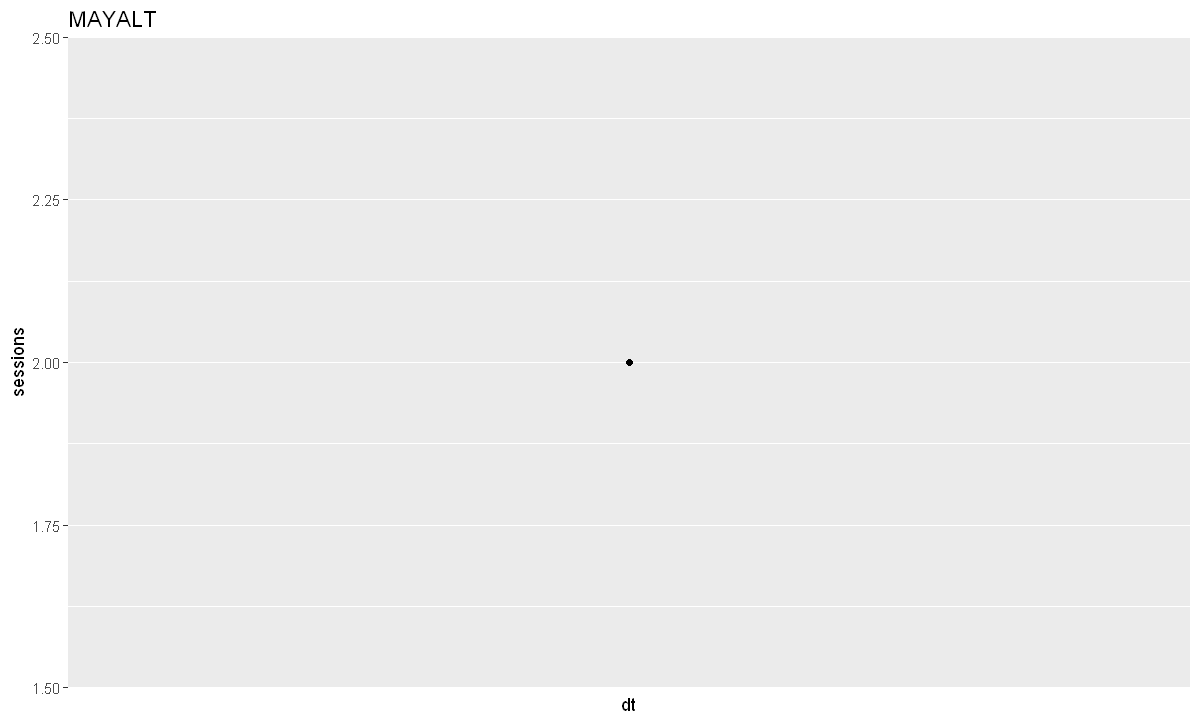

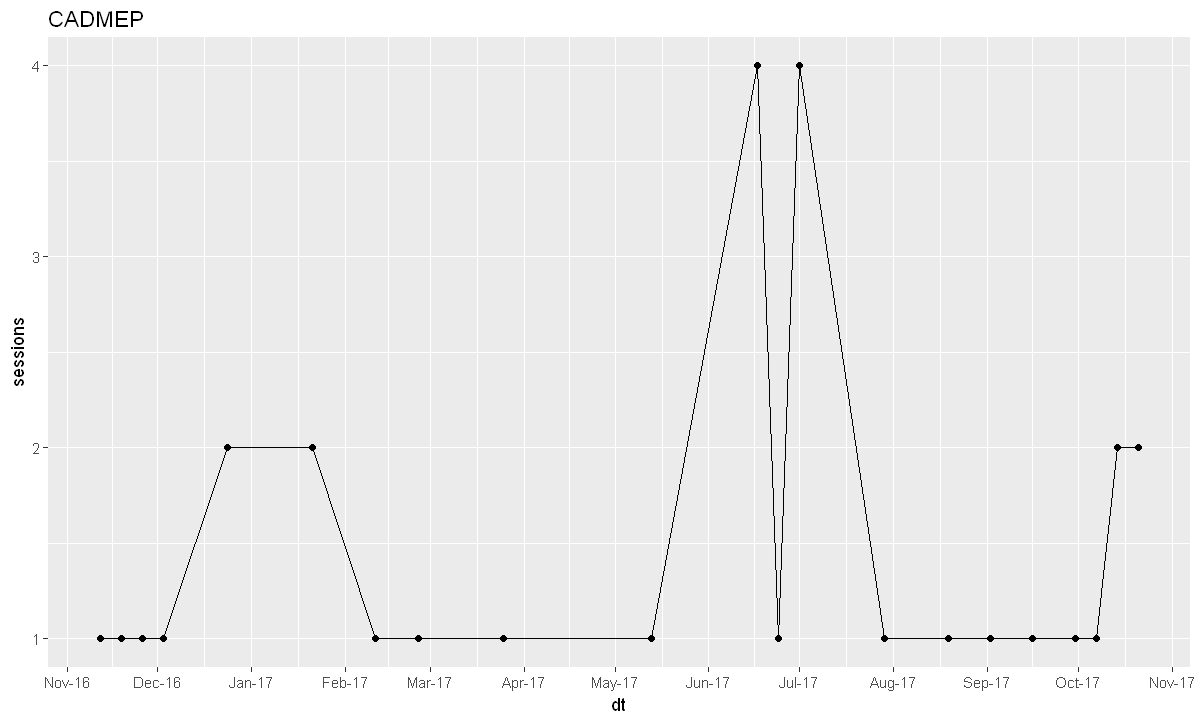

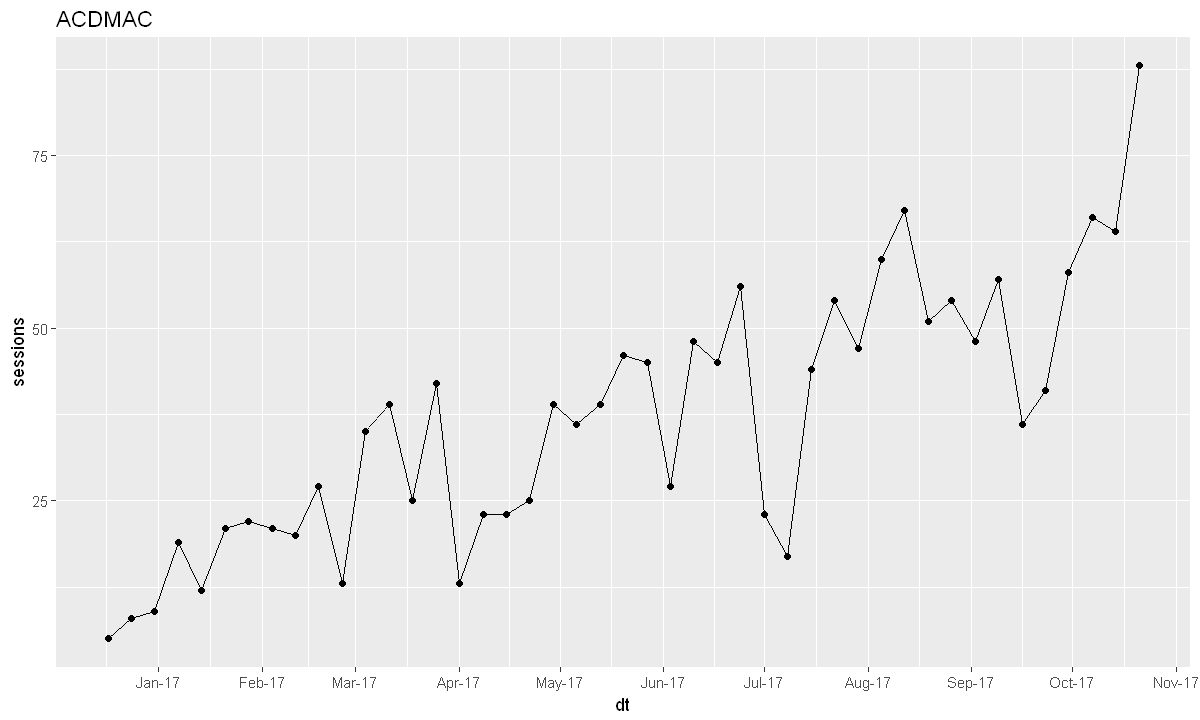

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


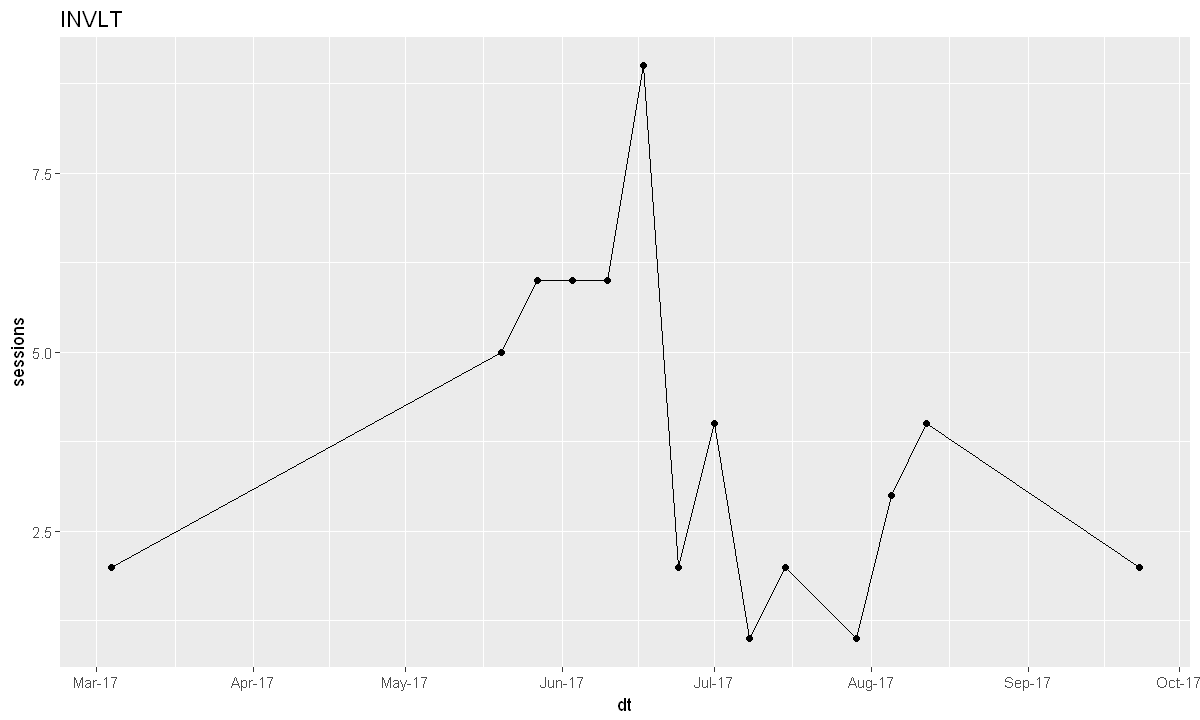

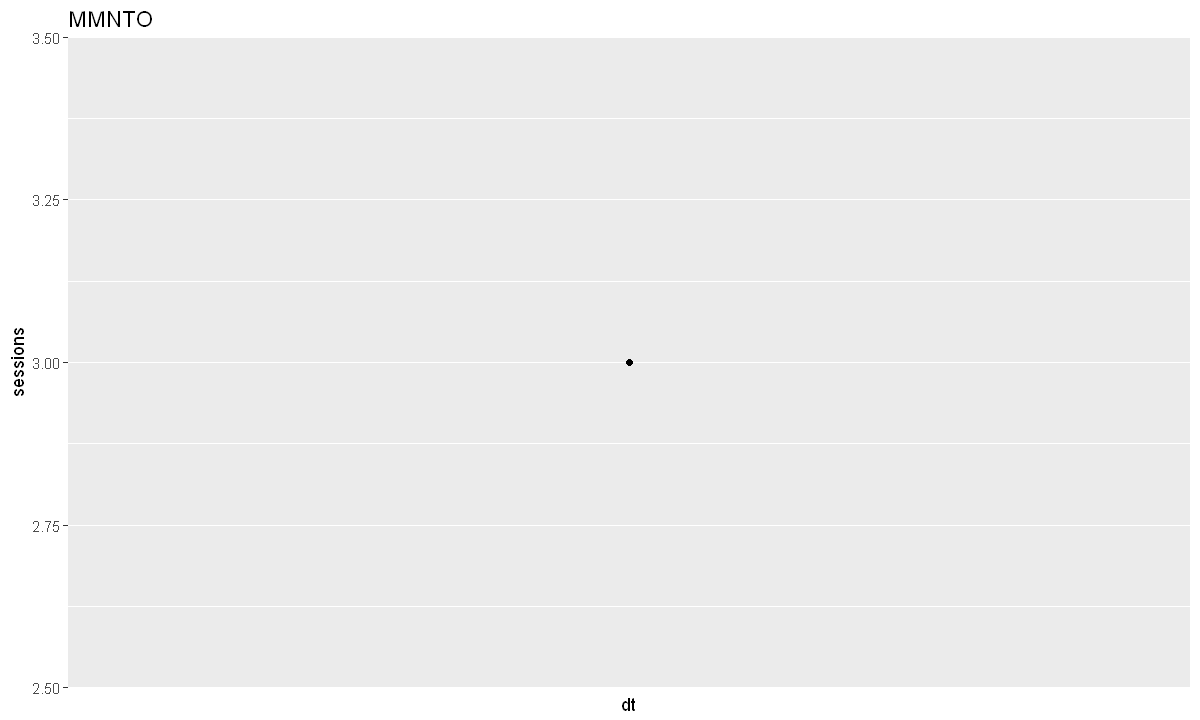

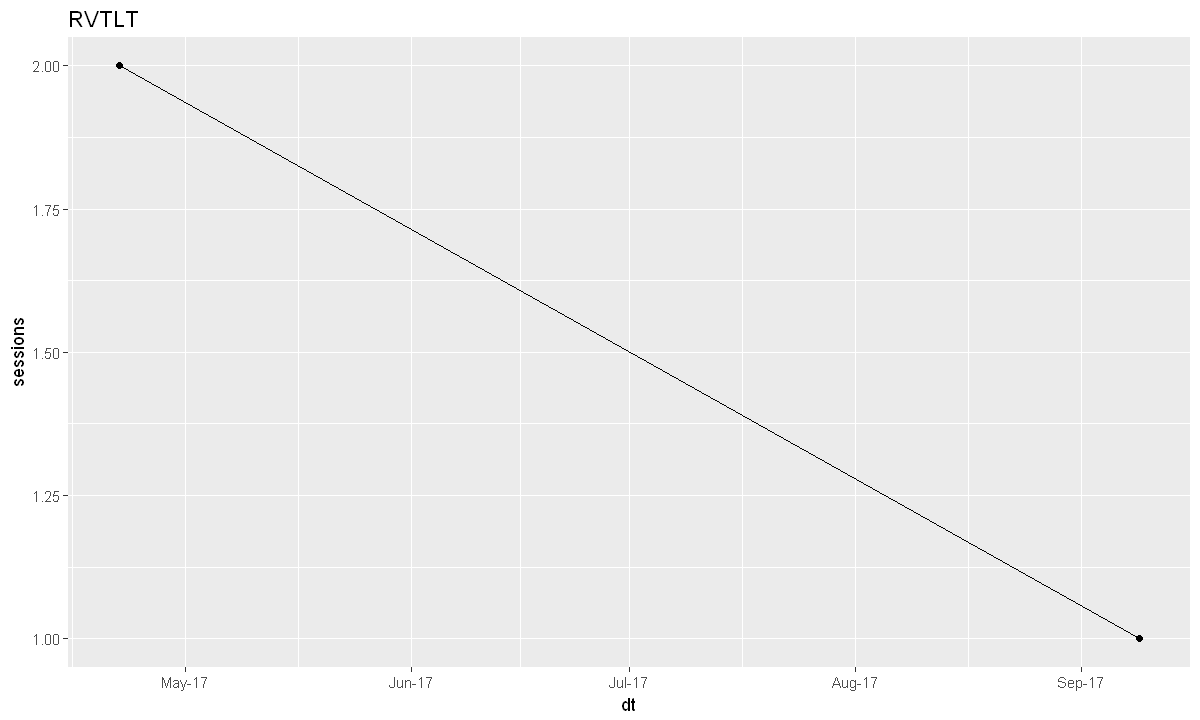

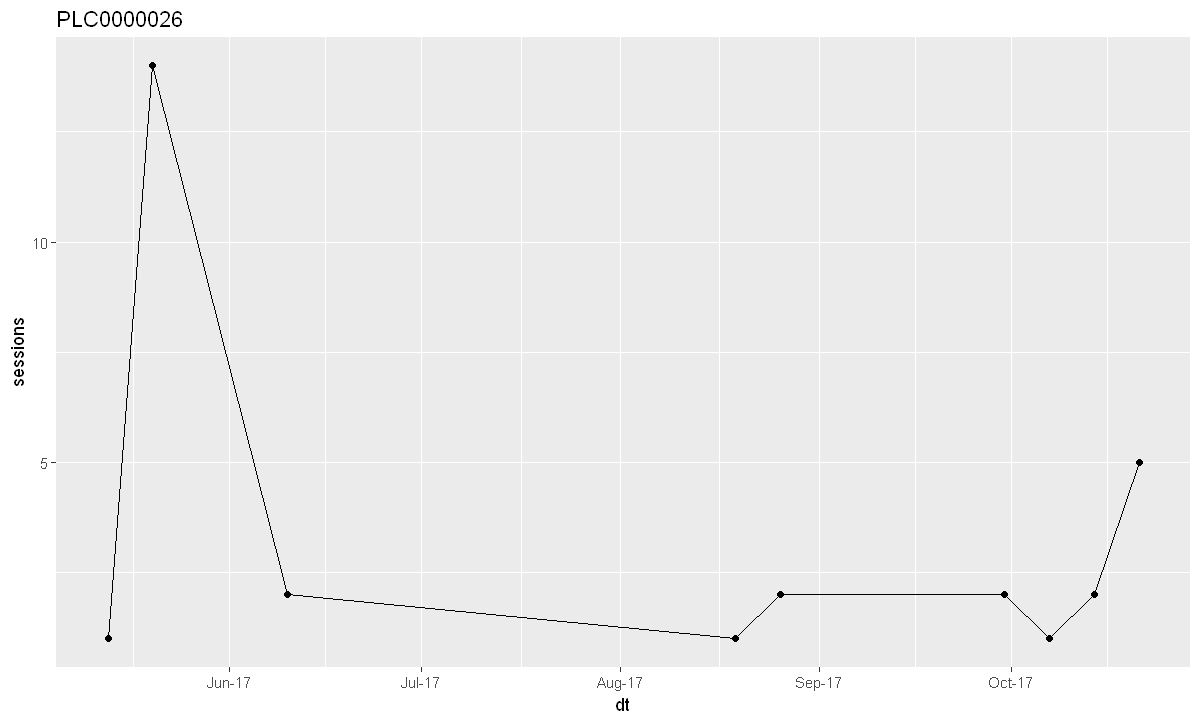

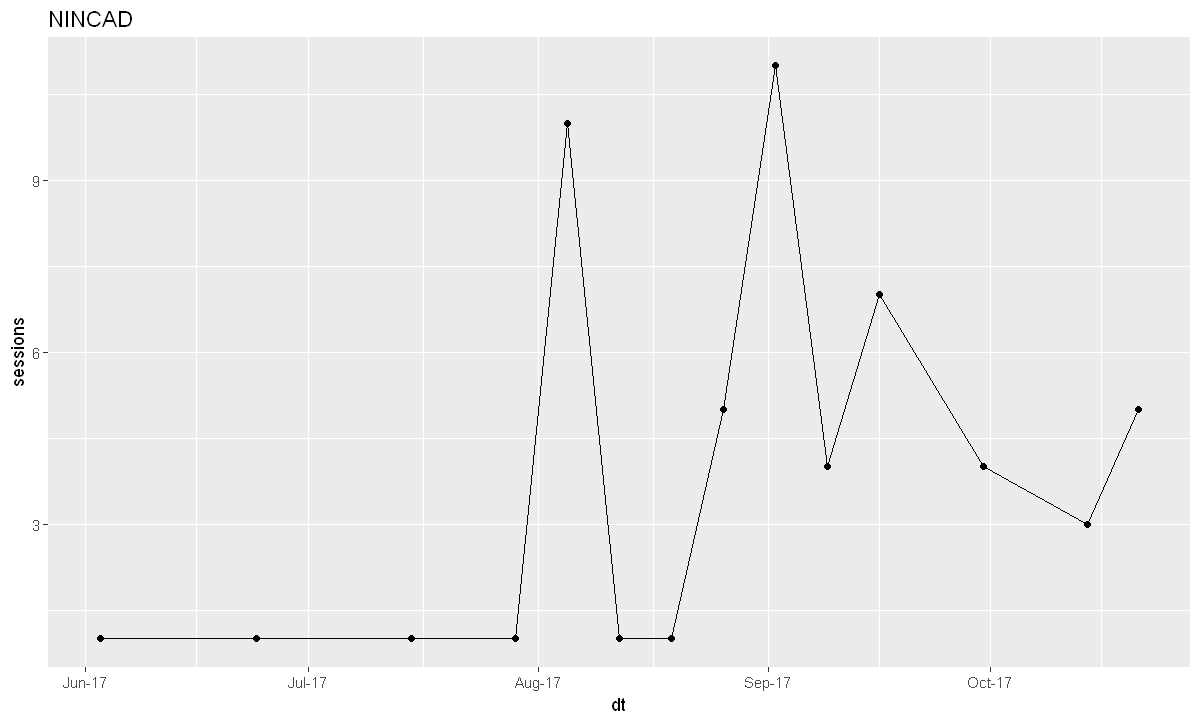

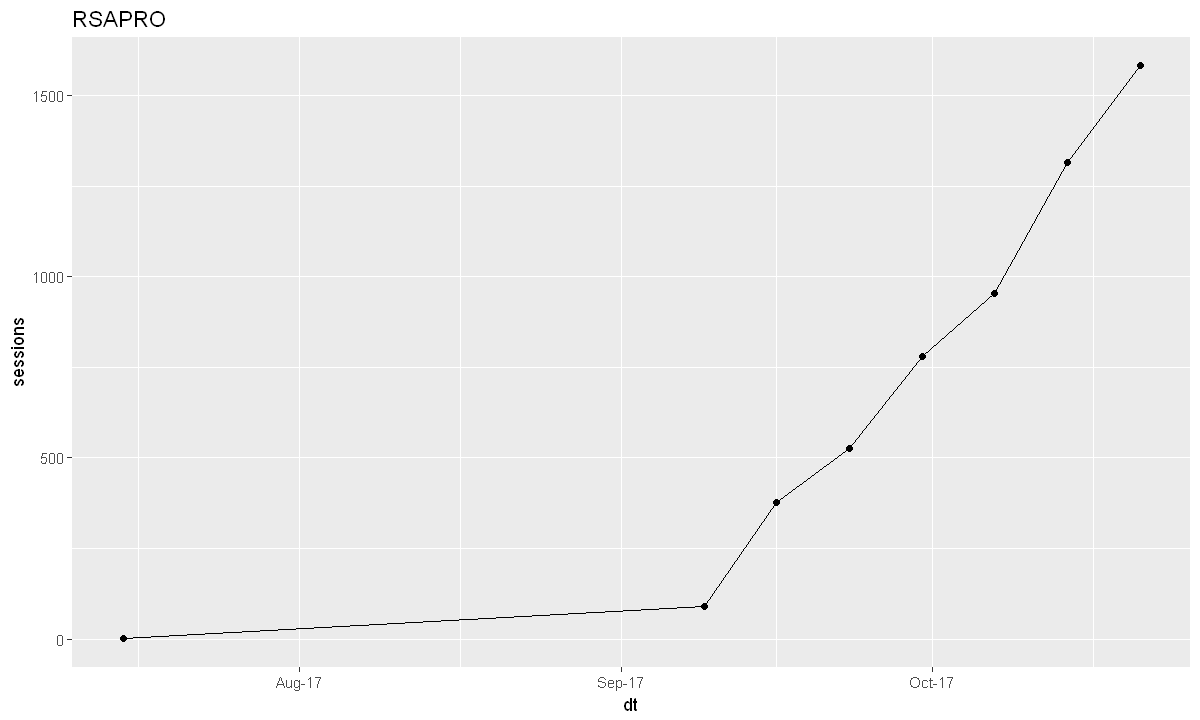

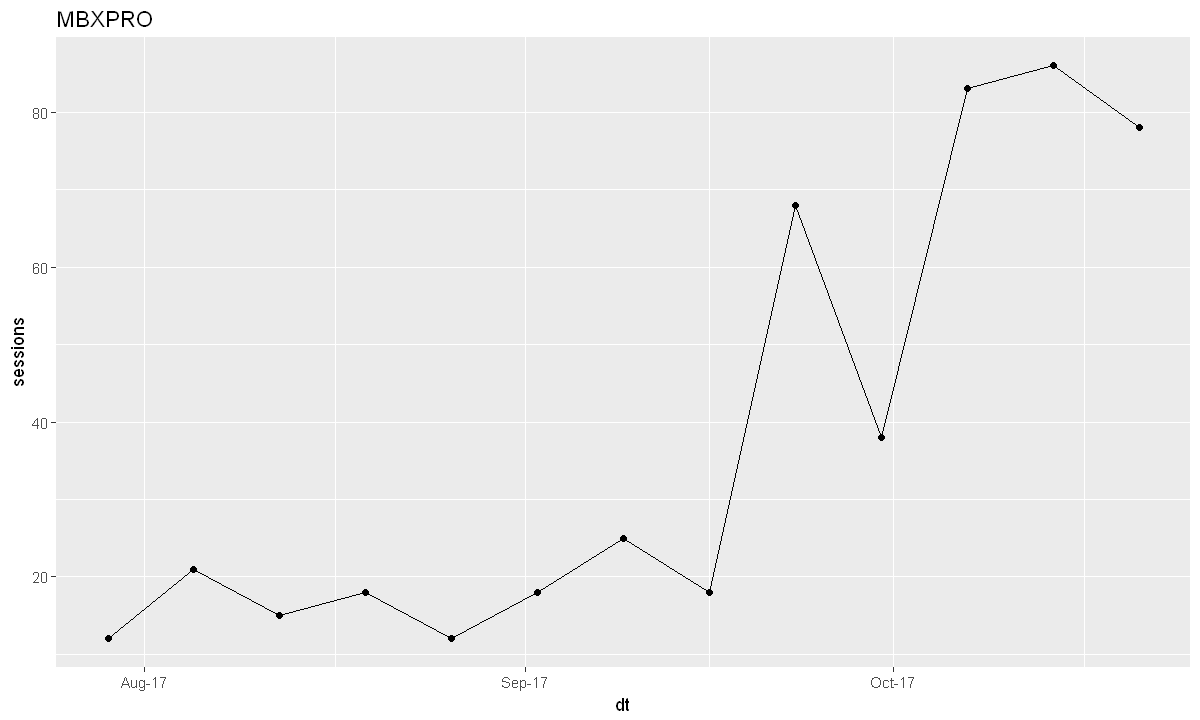

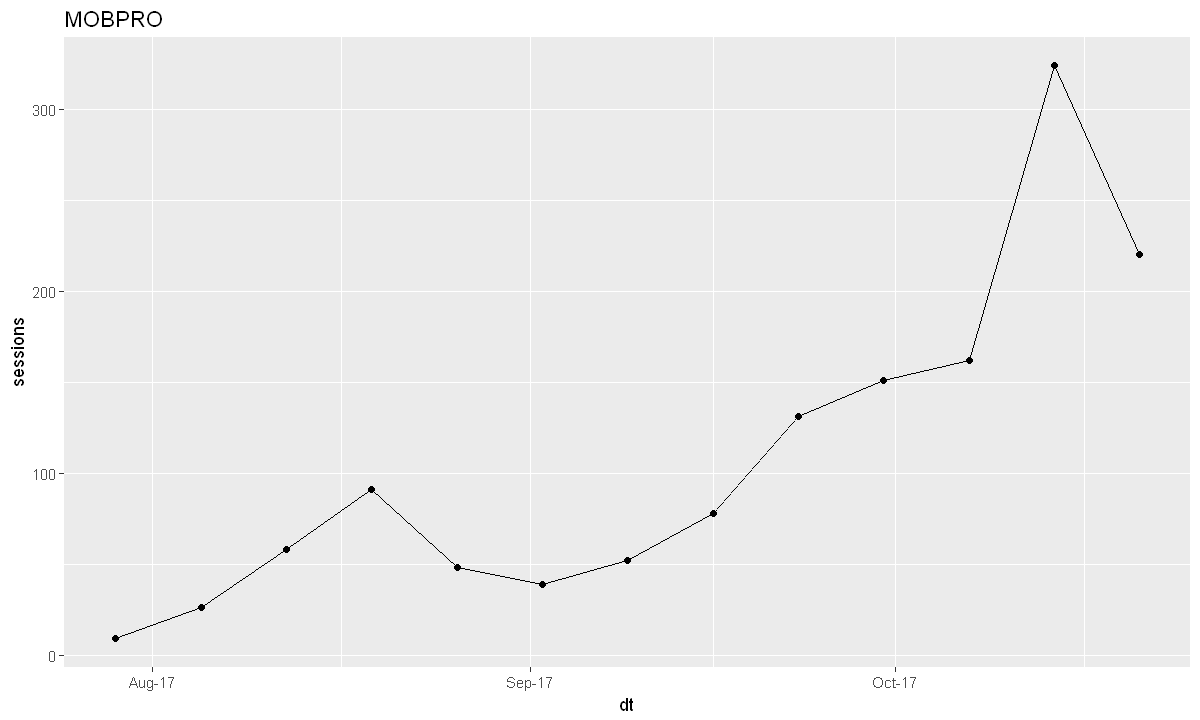

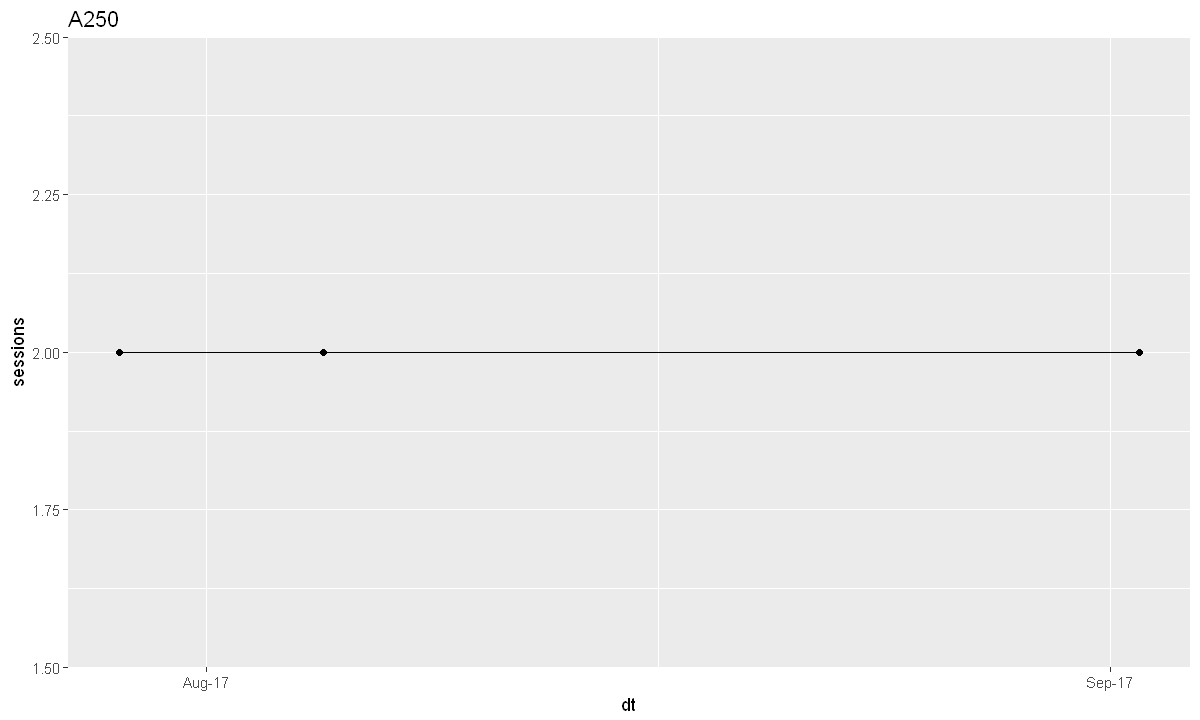

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


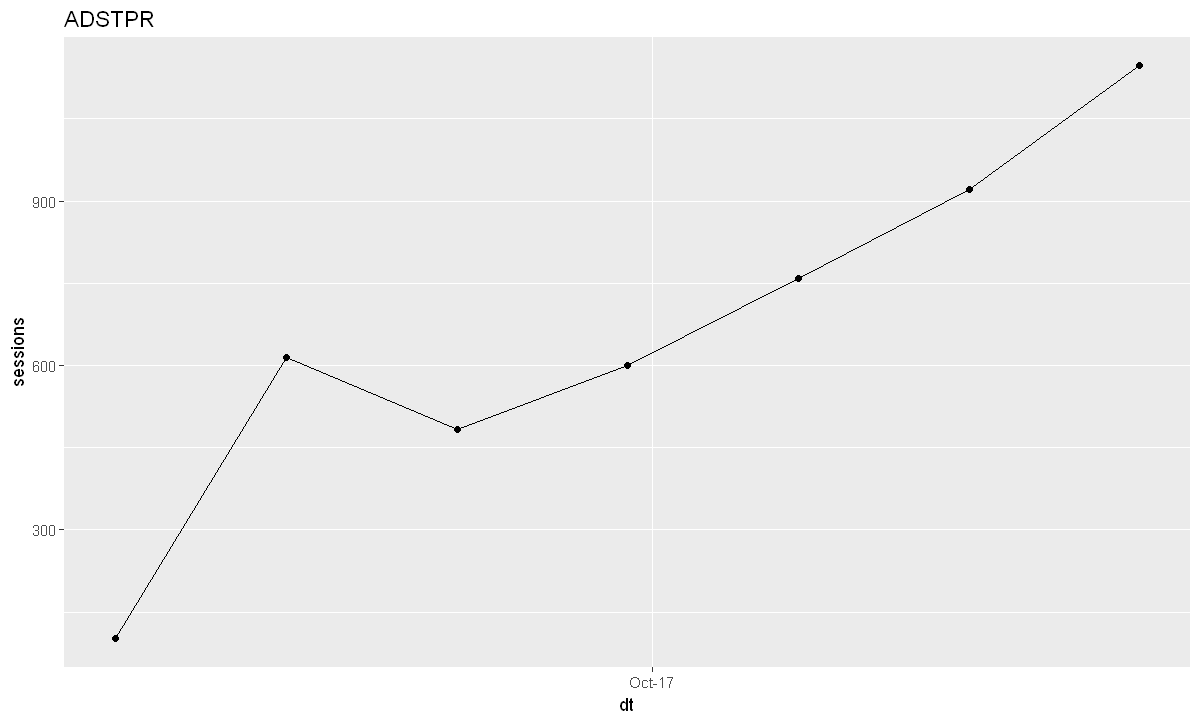

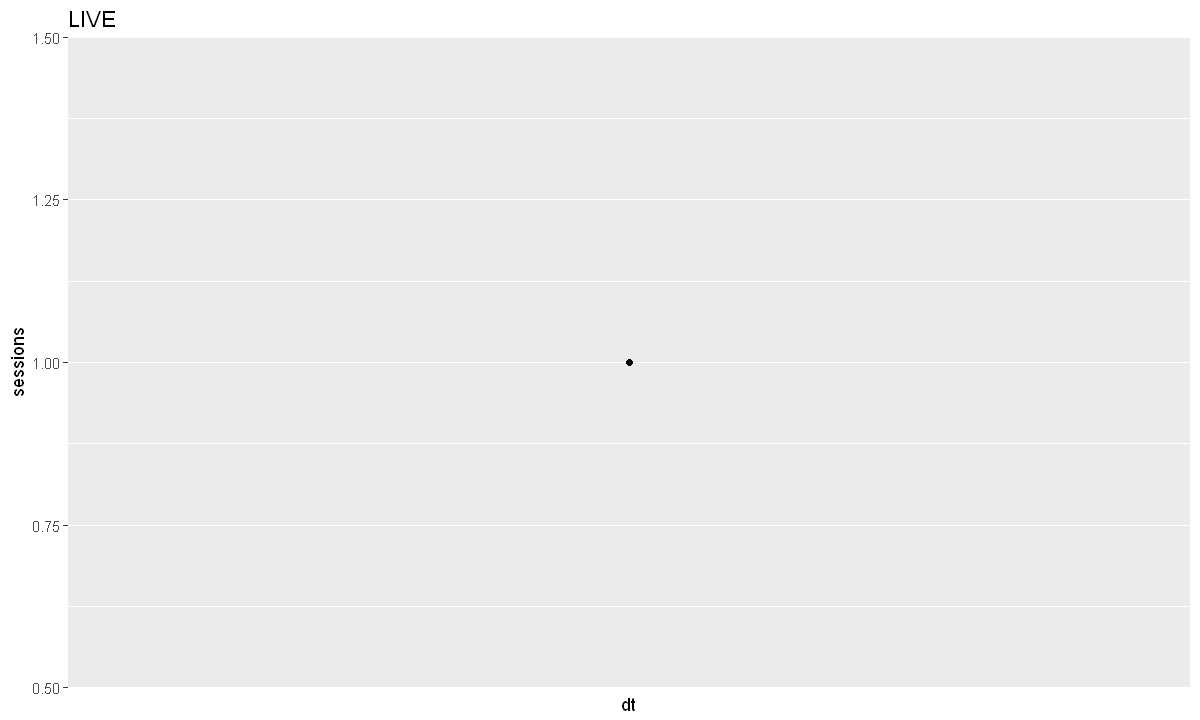

In [20]:
#-----------------------------------------------
Sys.setlocale("LC_ALL","English")
options(repr.plot.width=10, repr.plot.height=6)
#Time series analysis
#How users use ACD
all_data <- list()
graph_list <- list()
#
all_product_names <- unique(dataset$product_line_name)[-1]
dir.create("time_series_sessions")

for (i in 1 : length(all_product_names)) {
    all_data[[i]] <- dataset %>% 
        filter(product_line_name == all_product_names[i]) %>%
        group_by(dt) %>%
        summarise(sessions = sum(sessions))
    
    graph_list[[i]] <- all_data[[i]] %>%
        ggplot(mapping = aes(x = dt,y = sessions)) +
        geom_line()+
        geom_point() +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = all_product_names[i])
    print(graph_list[[i]])
    #In jupyter notebook display, we don't save the graphs but display them
    #ggsave(str_c("time_series_sessions/","plot",i,".png"),width = 30,height = 30*0.618,units = "cm")

}
